# 결측 데이터 시각화  
missingno 라이브러리 

In [82]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# train 데이터 불러오기
train = pd.read_csv("./data/car_insurance.csv")

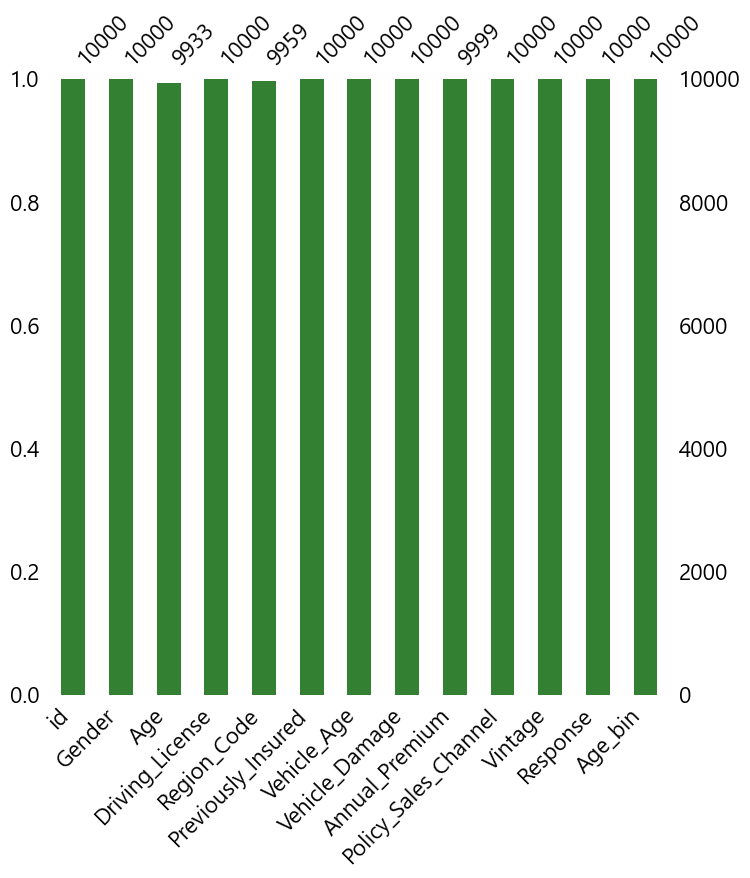

In [83]:
msno.bar(train, figsize=(8, 8), color=(0.2, 0.5, 0.2))

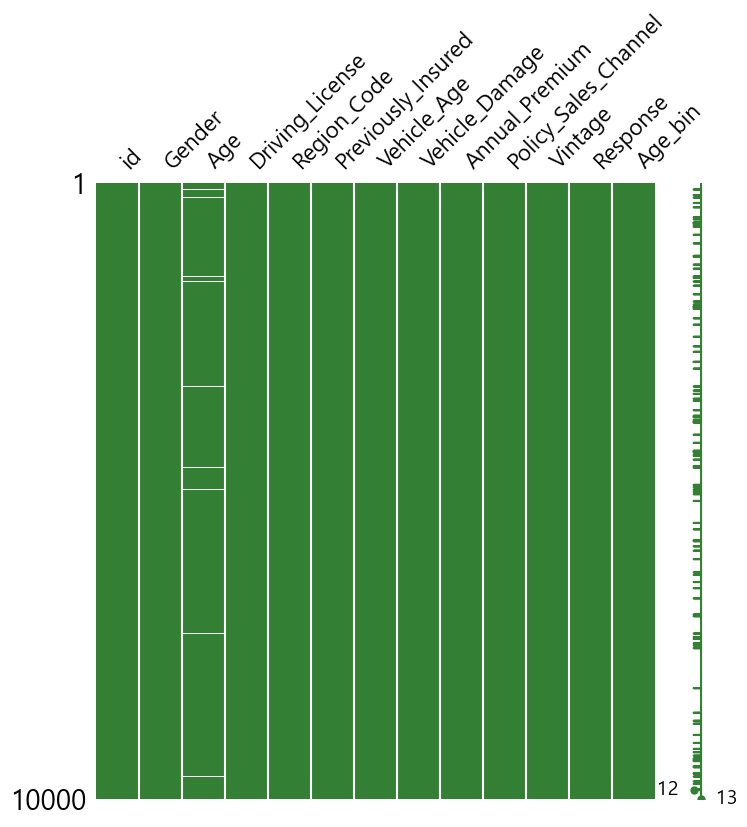

In [84]:
msno.matrix(train, figsize=(8, 8), color=(0.2, 0.5, 0.2))

## 상관 관계

In [49]:
train.corr(numeric_only=True)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,-0.002283,0.000818,0.005871,0.013003,-0.027786,0.004065,0.015841,-0.009036
Age,-0.002283,1.000000,-0.069446,0.040734,-0.263721,0.071845,-0.583923,-0.013717,0.120674
Driving_License,0.000818,-0.069446,1.000000,0.002085,0.015363,-0.029438,0.031047,0.003600,0.013565
Region_Code,0.005871,0.040734,0.002085,1.000000,-0.021096,-0.020492,-0.039451,-0.008807,0.003262
Previously_Insured,0.013003,-0.263721,0.015363,-0.021096,1.000000,0.011750,0.217041,0.008720,-0.345951
Annual_Premium,-0.027786,0.071845,-0.029438,-0.020492,0.011750,1.000000,-0.113973,0.002003,0.028151
Policy_Sales_Channel,0.004065,-0.583923,0.031047,-0.039451,0.217041,-0.113973,1.000000,-0.000921,-0.155416
Vintage,0.015841,-0.013717,0.003600,-0.008807,0.008720,0.002003,-0.000921,1.000000,0.002726
Response,-0.009036,0.120674,0.013565,0.003262,-0.345951,0.028151,-0.155416,0.002726,1.000000


In [51]:
train.loc[:, 'Age':].corr(numeric_only=True)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.069446,0.040734,-0.263721,0.071845,-0.583923,-0.013717,0.120674
Driving_License,-0.069446,1.000000,0.002085,0.015363,-0.029438,0.031047,0.003600,0.013565
Region_Code,0.040734,0.002085,1.000000,-0.021096,-0.020492,-0.039451,-0.008807,0.003262
Previously_Insured,-0.263721,0.015363,-0.021096,1.000000,0.011750,0.217041,0.008720,-0.345951
Annual_Premium,0.071845,-0.029438,-0.020492,0.011750,1.000000,-0.113973,0.002003,0.028151
Policy_Sales_Channel,-0.583923,0.031047,-0.039451,0.217041,-0.113973,1.000000,-0.000921,-0.155416
Vintage,-0.013717,0.003600,-0.008807,0.008720,0.002003,-0.000921,1.000000,0.002726
Response,0.120674,0.013565,0.003262,-0.345951,0.028151,-0.155416,0.002726,1.000000


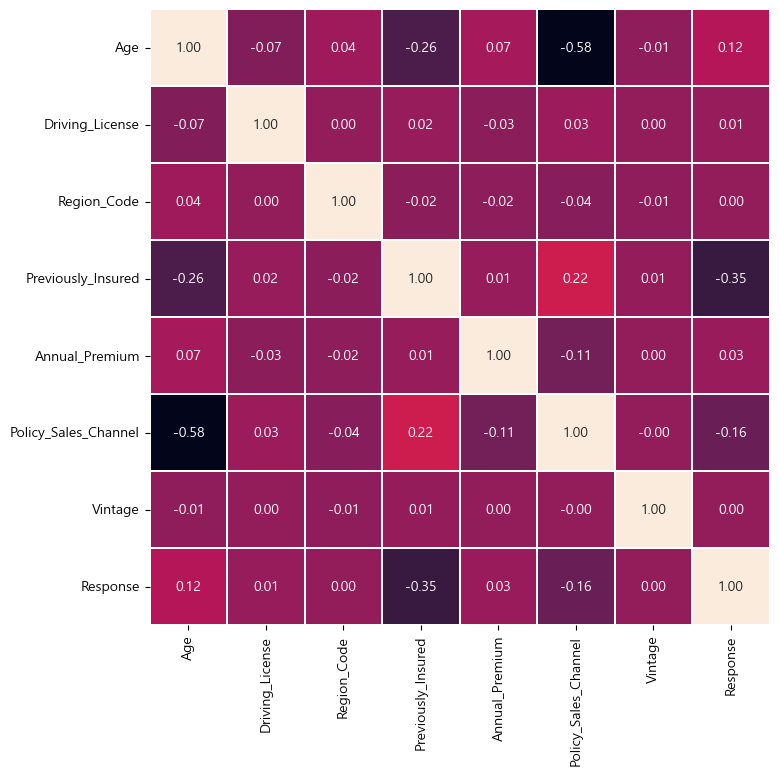

In [53]:
plt.figure(figsize=(8, 8))

sns.heatmap(data=train.loc[:, 'Age':].corr(numeric_only=True), annot=True, cbar=False,
           linewidths=0.05, linecolor="white", fmt= '.2f')

plt.show()

## Gender

In [54]:
train["Gender"].value_counts()

Gender
Male      5334
Female    4666
Name: count, dtype: int64

In [55]:
train["Gender"].value_counts() / len(train["Gender"])

Gender
Male      0.5334
Female    0.4666
Name: count, dtype: float64

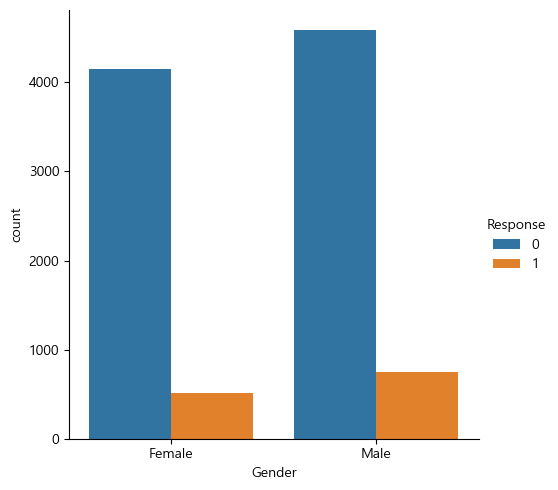

In [56]:
sns.catplot(x="Gender", kind='count', hue='Response', data=train)

<Axes: xlabel='Gender', ylabel='Response'>

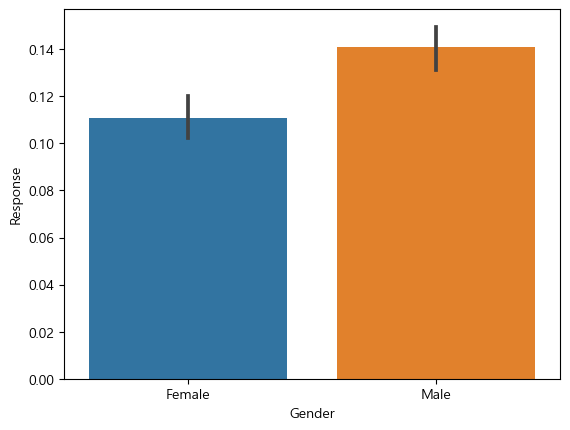

In [57]:
sns.barplot(x="Gender", y="Response", data=train)

<Axes: xlabel='Gender', ylabel='Count'>

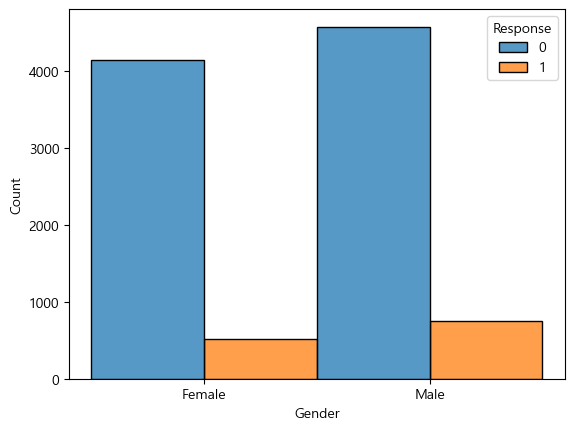

In [58]:
sns.histplot(x='Gender', hue='Response', multiple='dodge', data=train)

<Axes: xlabel='Gender', ylabel='Count'>

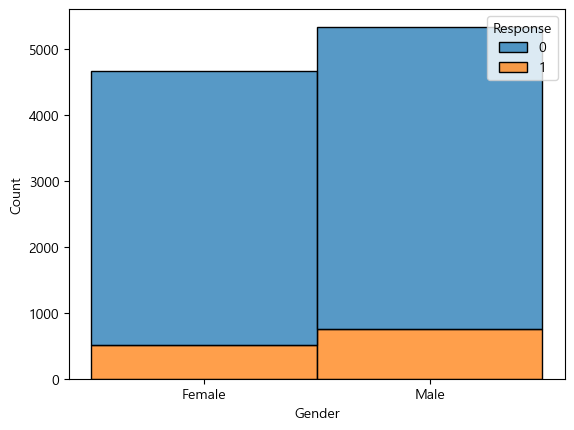

In [59]:
sns.histplot(x='Gender', hue='Response', multiple='stack', data=train)

<Axes: xlabel='Gender', ylabel='Count'>

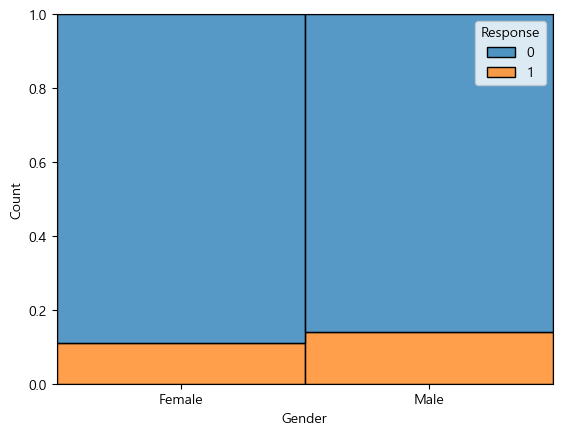

In [60]:
sns.histplot(x='Gender', hue='Response', multiple='fill', data=train)

## Age

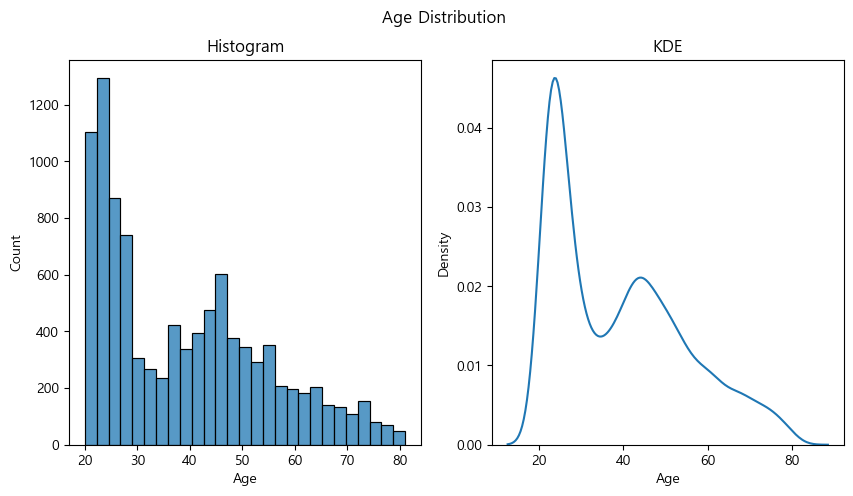

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Age Distribution')

# Train
sns.histplot(x='Age', data=train, ax=ax[0])
ax[0].set_title('Histogram')

# Test
sns.kdeplot( x='Age', data=train, ax=ax[1])
ax[1].set_title('KDE')

plt.show()

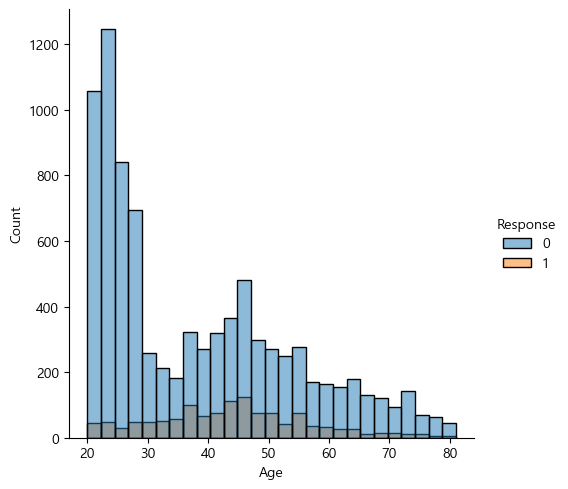

In [62]:
sns.displot(x='Age', kind='hist', hue='Response', data=train)

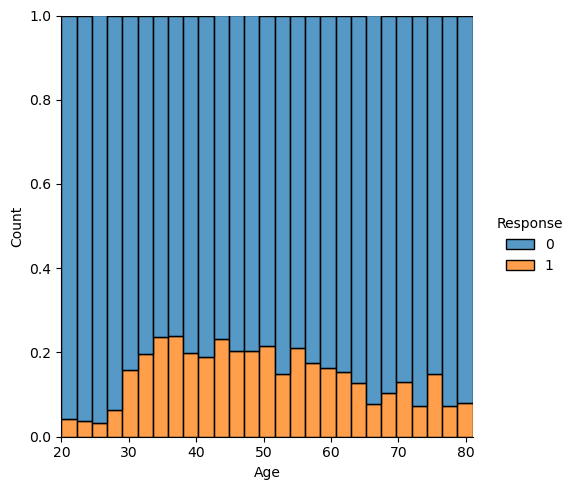

In [30]:
# 전체 경향을 비율로 파악할 수 있다.
sns.displot(x='Age', kind='hist', hue='Response', multiple='fill' ,data=train)

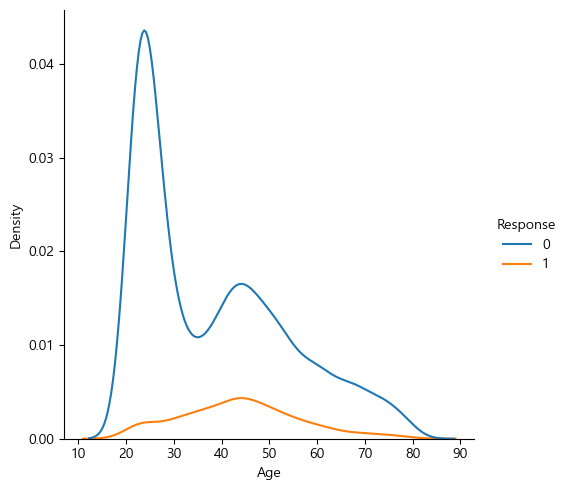

In [63]:
# 밀도함수
sns.displot(x='Age', kind='kde', hue='Response', data=train)

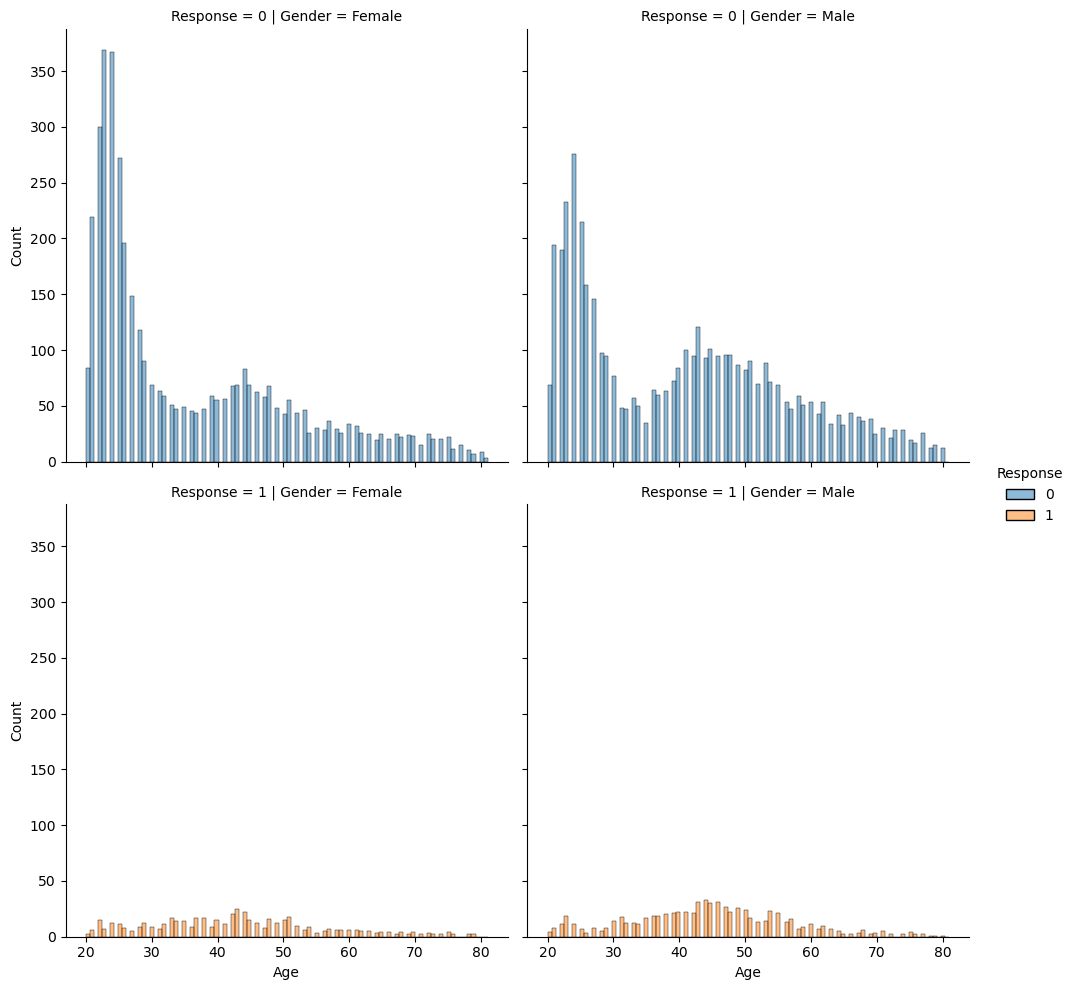

In [32]:
# col별로 그래프를 그릴 수 있다.
sns.displot(x='Age', col='Gender',row='Response' ,kind='hist', hue='Response', bins=100, data=train)

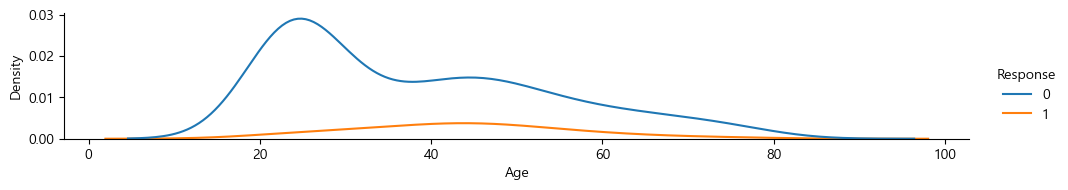

In [65]:
sns.displot(x='Age', kind='kde', hue='Response', bw_adjust=2, data=train, height=2, aspect=5)

### Age 구간 나누기

In [66]:
# Age 최소, 최대 구간 확인
max_age = train['Age'].max()
min_age = train['Age'].min()

print(f'최대: {max_age}')
print(f'최소: {min_age}')

최대: 81.0
최소: 20.0


In [67]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Female,28.0,1,11.0,1,< 1 Year,No,32264.0,152.0,61,0
1,2,Male,39.0,1,15.0,0,1-2 Year,Yes,33089.0,124.0,158,1
2,3,Female,25.0,1,42.0,1,< 1 Year,No,2630.0,160.0,220,0
3,4,Male,28.0,1,28.0,1,< 1 Year,No,31073.0,152.0,12,0
4,5,Male,66.0,1,46.0,1,1-2 Year,No,26174.0,26.0,80,0


In [68]:
train['Age_bin'] = "20s"
train.loc[train['Age'] >= 30, 'Age_bin'] = "30s"
train.loc[train['Age'] >= 40, 'Age_bin'] = "40s"
train.loc[train['Age'] >= 50, 'Age_bin'] = "50s"
train.loc[train['Age'] >= 60, 'Age_bin'] = "60s"
train.loc[train['Age'] >= 70, 'Age_bin'] = "70+s"

In [69]:
train['Age_bin'] = "20s"
train.loc[train['Age'] >= 30, 'Age_bin'] = "30s"
train.loc[train['Age'] >= 40, 'Age_bin'] = "40s"
train.loc[train['Age'] >= 50, 'Age_bin'] = "50s"
train.loc[train['Age'] >= 60, 'Age_bin'] = "60s"
train.loc[train['Age'] >= 70, 'Age_bin'] = "70+s"

train['Age_bin'].value_counts()

Age_bin
20s     4074
40s     2025
30s     1393
50s     1285
60s      764
70+s     459
Name: count, dtype: int64

<Axes: xlabel='Age_bin', ylabel='Annual_Premium'>

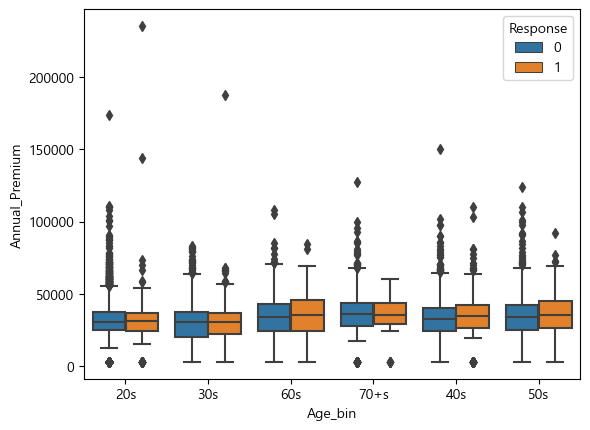

In [70]:
sns.boxplot(x='Age_bin', y='Annual_Premium', hue='Response', data=train)

### 이상치 제거

In [71]:
age_train = train.loc[train['Annual_Premium'] < 60000, :]
age_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bin
0,1,Female,28.0,1,11.0,1,< 1 Year,No,32264.0,152.0,61,0,20s
1,2,Male,39.0,1,15.0,0,1-2 Year,Yes,33089.0,124.0,158,1,30s
2,3,Female,25.0,1,42.0,1,< 1 Year,No,2630.0,160.0,220,0,20s
3,4,Male,28.0,1,28.0,1,< 1 Year,No,31073.0,152.0,12,0,20s
4,5,Male,66.0,1,46.0,1,1-2 Year,No,26174.0,26.0,80,0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,Female,69.0,1,28.0,0,1-2 Year,Yes,47327.0,122.0,220,0,60s
9995,9996,Male,60.0,1,38.0,0,1-2 Year,Yes,2630.0,157.0,281,0,60s
9996,9997,Male,30.0,1,8.0,0,< 1 Year,Yes,2630.0,156.0,18,1,30s
9998,9999,Male,24.0,1,33.0,0,< 1 Year,Yes,27377.0,152.0,153,0,20s


In [72]:
age_train = age_train.reset_index(drop=True)
age_train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_bin
0,1,Female,28.0,1,11.0,1,< 1 Year,No,32264.0,152.0,61,0,20s
1,2,Male,39.0,1,15.0,0,1-2 Year,Yes,33089.0,124.0,158,1,30s
2,3,Female,25.0,1,42.0,1,< 1 Year,No,2630.0,160.0,220,0,20s
3,4,Male,28.0,1,28.0,1,< 1 Year,No,31073.0,152.0,12,0,20s
4,5,Male,66.0,1,46.0,1,1-2 Year,No,26174.0,26.0,80,0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,9995,Female,69.0,1,28.0,0,1-2 Year,Yes,47327.0,122.0,220,0,60s
9642,9996,Male,60.0,1,38.0,0,1-2 Year,Yes,2630.0,157.0,281,0,60s
9643,9997,Male,30.0,1,8.0,0,< 1 Year,Yes,2630.0,156.0,18,1,30s
9644,9999,Male,24.0,1,33.0,0,< 1 Year,Yes,27377.0,152.0,153,0,20s


<Axes: xlabel='Age_bin', ylabel='Annual_Premium'>

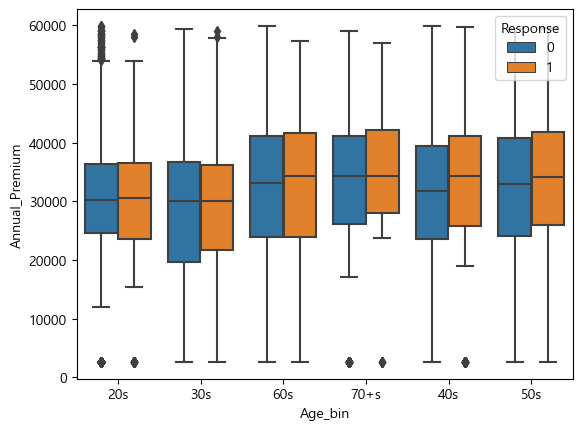

In [73]:
sns.boxplot(x='Age_bin', y='Annual_Premium', hue='Response', data=age_train)

['20s', '30s', '40s', '50s', '60s', '70+s']


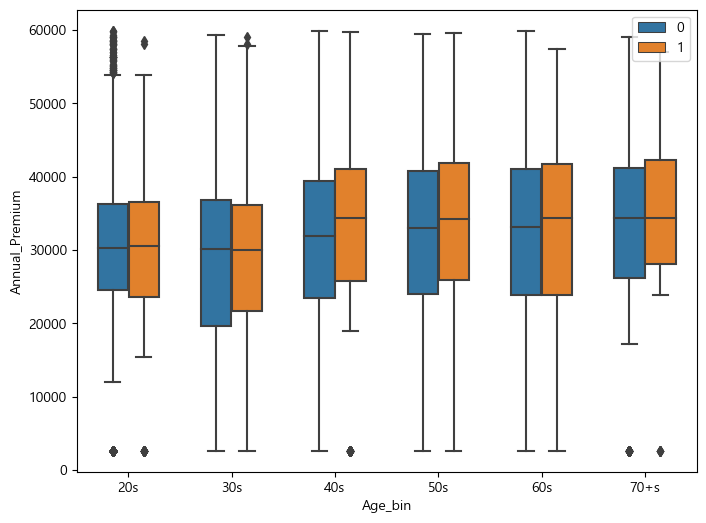

In [74]:
# 나이 순서대로 정리
age_bin_order = sorted(age_train['Age_bin'].unique(), reverse=False)
print(age_bin_order)

plt.figure(figsize=(8, 6))

sns.boxplot(x='Age_bin', y='Annual_Premium', hue='Response', 
            order=age_bin_order, 
            width=0.6, 
            data=age_train)

plt.legend(loc="upper right")

## Driving_License

In [75]:
train["Driving_License"].value_counts()

Driving_License
1    9974
0      26
Name: count, dtype: int64

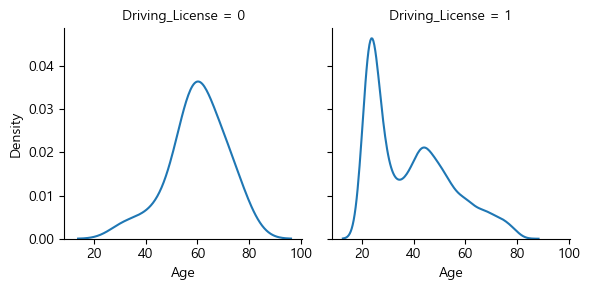

In [76]:
g = sns.FacetGrid(train, col='Driving_License')
g.map(sns.kdeplot, 'Age')

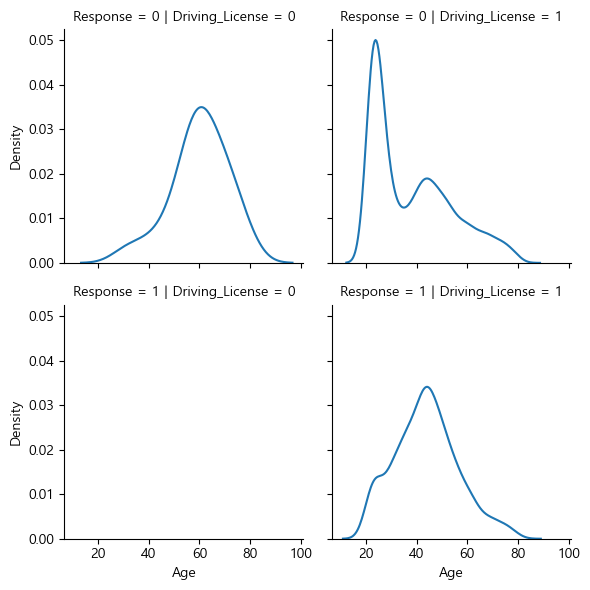

In [77]:
g = sns.FacetGrid(train, col='Driving_License', row='Response')
g.map(sns.kdeplot, 'Age')